In [251]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelSpreading
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelPropagation


In [252]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, class_sep=0.5)

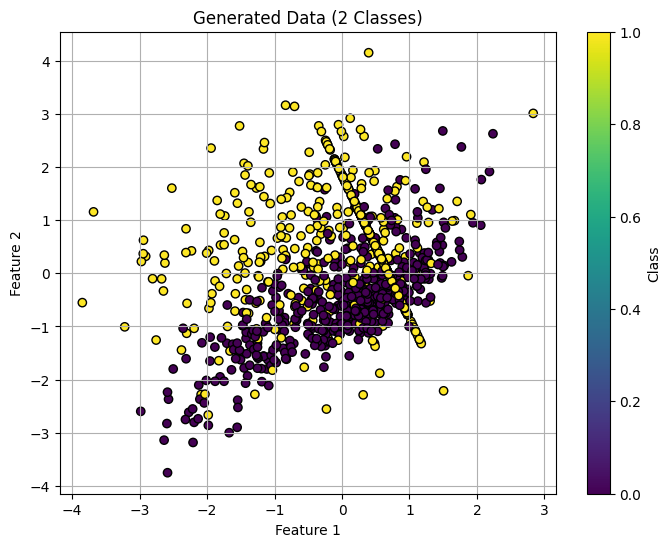

In [253]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Generated Data (2 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [254]:
# Make copies of the original data
X_new = X.copy()
y_new = y.copy()

# Count the number of samples in each class
class_0_count = np.sum(y == 0)
class_1_count = np.sum(y == 1)

# Calculate the number of samples to mark as unlabeled for each class
num_unlabeled_class_0 = int(0.7 * class_0_count)
num_unlabeled_class_1 = int(0.7 * class_1_count)

# Randomly select samples to mark as unlabeled for each class
indices_class_0 = np.random.choice(np.where(y == 0)[0], num_unlabeled_class_0, replace=False)
indices_class_1 = np.random.choice(np.where(y == 1)[0], num_unlabeled_class_1, replace=False)

# Mark selected samples as unlabeled in the copied labels array (assign class -1)
y_new[indices_class_0] = -1
y_new[indices_class_1] = -1

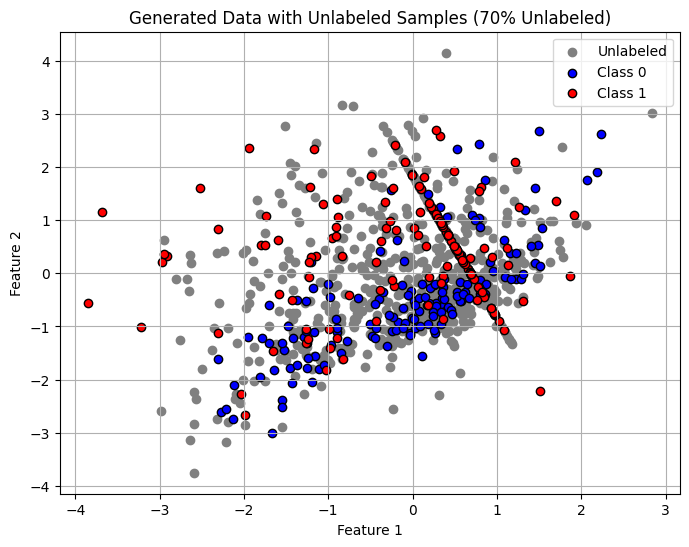

In [255]:
plt.figure(figsize=(8, 6))
plt.scatter(X_new[y_new==-1, 0], X_new[y_new==-1, 1], color='gray', marker='o', label='Unlabeled')
plt.scatter(X_new[y_new==0, 0], X_new[y_new==0, 1], color='blue', marker='o', edgecolor='k', label='Class 0')
plt.scatter(X_new[y_new==1, 0], X_new[y_new==1, 1], color='red', marker='o', edgecolor='k', label='Class 1')
plt.title('Generated Data with Unlabeled Samples (70% Unlabeled)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [256]:
# Construct adjacency matrix based on labeled data
def construct_adjacency_matrix(X, y):
    num_samples = len(X)
    adjacency_matrix = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            if y[i] == y[j]:
                adjacency_matrix[i][j] = adjacency_matrix[j][i] = 1  # Connect points with the same class
    return adjacency_matrix

# Construct adjacency matrix
adjacency_matrix = construct_adjacency_matrix(X_new, y_new)

spectral_clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
y_pred = spectral_clustering.fit_predict(adjacency_matrix)


/home/bwojcik/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [257]:
accuracy = accuracy_score(y, y_pred)
accuracy

0.351

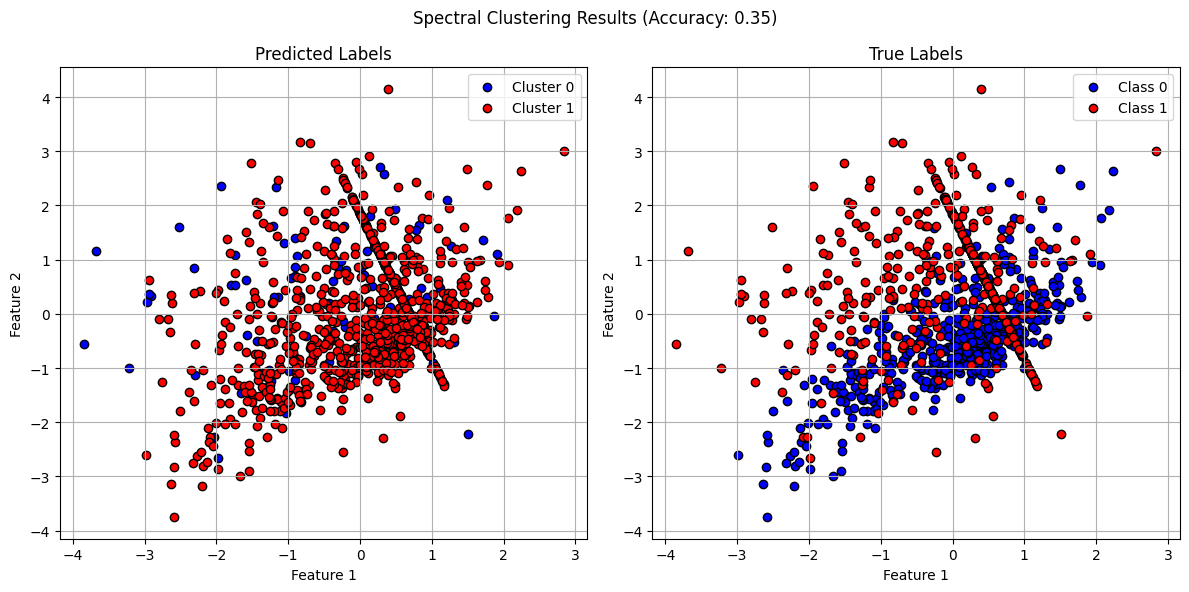

In [258]:
# Plot the data with predicted labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='blue', marker='o', edgecolor='k', label='Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='red', marker='o', edgecolor='k', label='Cluster 1')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', edgecolor='k', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', edgecolor='k', label='Class 1')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.suptitle(f'Spectral Clustering Results (Accuracy: {accuracy:.2f})')
plt.tight_layout()
plt.show()

0.853


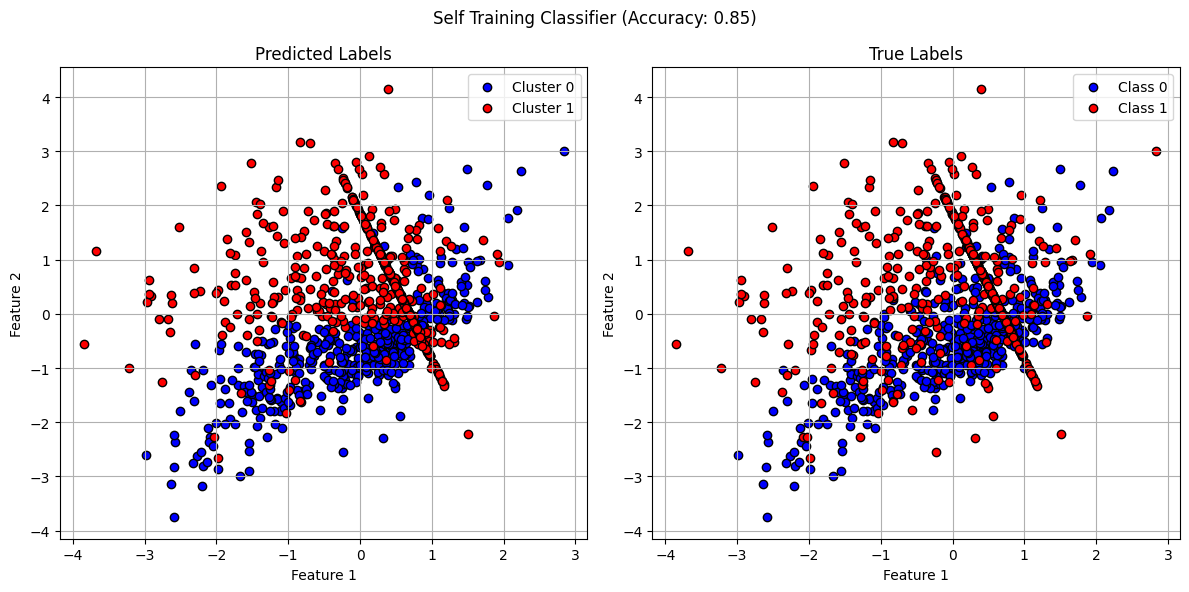

In [259]:

classifier = RandomForestClassifier()
self_training_model = SelfTrainingClassifier(classifier)
self_training_model.fit(X_new, y_new)
y_pred = self_training_model.predict(X_new)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

# Plot the data with predicted labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='blue', marker='o', edgecolor='k', label='Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='red', marker='o', edgecolor='k', label='Cluster 1')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
accuracy
plt.subplot(1, 2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', edgecolor='k', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', edgecolor='k', label='Class 1')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.suptitle(f'Self Training Classifier (Accuracy: {accuracy:.2f})')
plt.tight_layout()
plt.show()

0.805


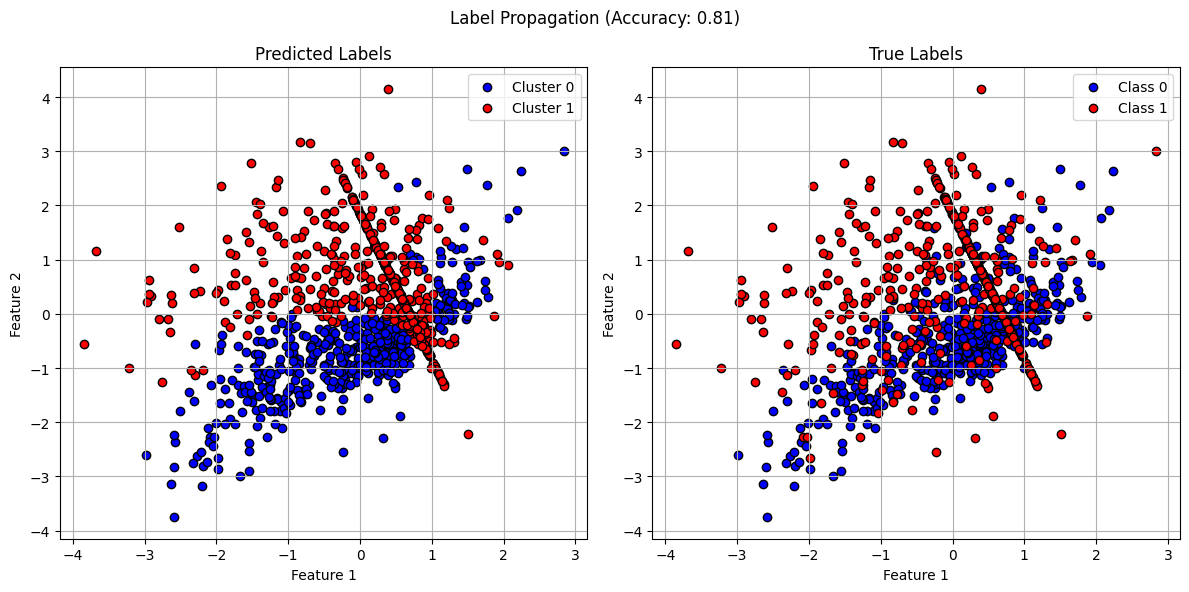

In [260]:

model = LabelPropagation()
model.fit(X_new, y_new)
y_pred = model.predict(X_new)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

# Plot the data with predicted labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='blue', marker='o', edgecolor='k', label='Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='red', marker='o', edgecolor='k', label='Cluster 1')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
accuracy
plt.subplot(1, 2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', edgecolor='k', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', edgecolor='k', label='Class 1')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.suptitle(f'Label Propagation (Accuracy: {accuracy:.2f})')
plt.tight_layout()
plt.show()

0.818


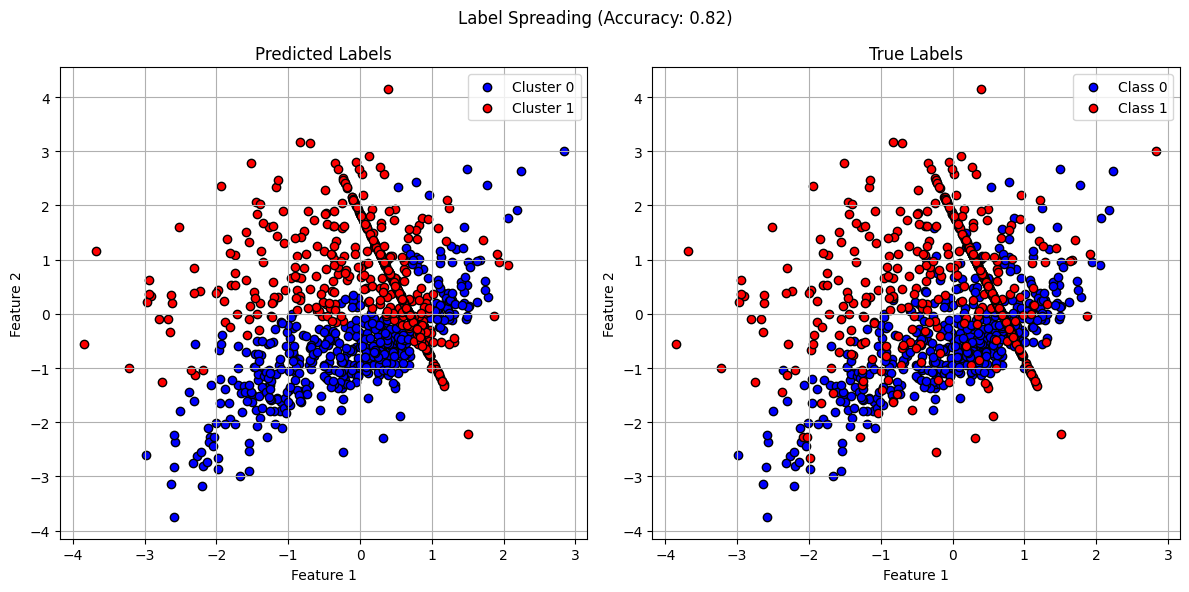

In [261]:

model = LabelSpreading()
model.fit(X_new, y_new)
y_pred = model.predict(X_new)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

# Plot the data with predicted labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='blue', marker='o', edgecolor='k', label='Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='red', marker='o', edgecolor='k', label='Cluster 1')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
accuracy
plt.subplot(1, 2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', edgecolor='k', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', edgecolor='k', label='Class 1')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.suptitle(f'Label Spreading (Accuracy: {accuracy:.2f})')
plt.tight_layout()
plt.show()